# Analysis of GCAM-USA's Total Annual State Loads

This notebook executes the initial set of runs of the TELL model for IM3's Experiment Group B.

In [1]:
# Start by importing the packages we need:
import os

import pandas as pd
import matplotlib.pyplot as plt


## Set the Directory Structure

In [2]:
# Identify the top-level directory and the subdirectory where the data will be stored:
data_input_dir =  '/Users/burl878/Documents/Research/IMMM/Data/TELL/Production_Runs/tell_data/gcamusa_data/'
image_output_dir =  '/Users/burl878/Documents/code_repos/exp_group_b_test/analyses/plots/total_load/'

# If the "image_output_dir" subdirectory doesn't exist then create it:
if not os.path.exists(image_output_dir):
   os.makedirs(image_output_dir)


## Process the GCAM-USA Output File

In [3]:
# Read in the 'gcamDataTable_aggParam.csv' file:
gcam_df = pd.read_csv(data_input_dir + 'gcamDataTable_aggParam.csv')

# Subset the data to only the total annual demand for electricity by state:
gcam_df = gcam_df[gcam_df['param'].isin(['elecFinalBySecTWh'])]

# Rename the columns to add the units to each variable:
gcam_df.rename(columns={'subRegion': 'state',
                        'x': 'year',
                        'value': 'load_TWh'}, inplace=True)

# Convert the year variable to an integer:
gcam_df['year'] = gcam_df['year'].astype(int)

# Only keep the columns that are needed:
gcam_df = gcam_df[['scenario', 'state', 'year', 'load_TWh']].copy()

gcam_df


,scenario,state,year,load_TWh
135,rcp85cooler_ssp3,AK,1975,0.510868
136,rcp85cooler_ssp3,AK,1990,4.967655
137,rcp85cooler_ssp3,AK,2005,6.583501
138,rcp85cooler_ssp3,AK,2010,6.881499
139,rcp85cooler_ssp3,AK,2015,6.709779
...,...,...,...,...
148147,rcp45hotter_ssp5,WY,2080,37.512066
148148,rcp45hotter_ssp5,WY,2085,39.437114
148149,rcp45hotter_ssp5,WY,2090,41.282365
148150,rcp45hotter_ssp5,WY,2095,42.812792


In [7]:
# Define a function to plot the time series of annual demand for a given state:
def plot_load_time_series(gcam_df, state: str, image_output_dir: str, image_resolution: int, save_images=False):
    
    # Subset the data to only the state you want to visualize:
    state_df = gcam_df[gcam_df['state'].isin([state])]
    
    # Subset to the time series for each scenario:
    rcp45cooler_ssp3 = state_df[state_df['scenario'].isin(['rcp45cooler_ssp3'])]
    rcp45cooler_ssp5 = state_df[state_df['scenario'].isin(['rcp45cooler_ssp5'])]
    rcp45hotter_ssp3 = state_df[state_df['scenario'].isin(['rcp45hotter_ssp3'])]
    rcp45hotter_ssp5 = state_df[state_df['scenario'].isin(['rcp45hotter_ssp5'])]
    rcp85cooler_ssp3 = state_df[state_df['scenario'].isin(['rcp85cooler_ssp3'])]
    rcp85cooler_ssp5 = state_df[state_df['scenario'].isin(['rcp85cooler_ssp5'])]
    rcp85hotter_ssp3 = state_df[state_df['scenario'].isin(['rcp85hotter_ssp3'])]
    rcp85hotter_ssp5 = state_df[state_df['scenario'].isin(['rcp85hotter_ssp5'])]
    
    # Subset between historic and future years:
    historic = rcp45cooler_ssp3.loc[rcp45cooler_ssp3['year'] <= 2020]
    rcp45cooler_ssp3 = rcp45cooler_ssp3.loc[rcp45cooler_ssp3['year'] >= 2020]
    rcp45cooler_ssp5 = rcp45cooler_ssp5.loc[rcp45cooler_ssp5['year'] >= 2020]
    rcp45hotter_ssp3 = rcp45hotter_ssp3.loc[rcp45hotter_ssp3['year'] >= 2020]
    rcp45hotter_ssp5 = rcp45hotter_ssp5.loc[rcp45hotter_ssp5['year'] >= 2020]
    rcp85cooler_ssp3 = rcp85cooler_ssp3.loc[rcp85cooler_ssp3['year'] >= 2020]
    rcp85cooler_ssp5 = rcp85cooler_ssp5.loc[rcp85cooler_ssp5['year'] >= 2020]
    rcp85hotter_ssp3 = rcp85hotter_ssp3.loc[rcp85hotter_ssp3['year'] >= 2020]
    rcp85hotter_ssp5 = rcp85hotter_ssp5.loc[rcp85hotter_ssp5['year'] >= 2020]
    
    # Make the plot:
    plt.figure(figsize=(10, 5))
    plt.rcParams['font.size'] = 16
    plt.plot(historic['year'], historic['load_TWh'], color='black', linestyle='-', label='historic', linewidth=2)
    plt.plot(rcp45cooler_ssp3['year'], rcp45cooler_ssp3['load_TWh'], color='blue', linestyle='--', label='rcp45cooler_ssp3', linewidth=2)
    plt.plot(rcp45cooler_ssp5['year'], rcp45cooler_ssp5['load_TWh'], color='blue', linestyle='-', label='rcp45cooler_ssp5', linewidth=2)
    plt.plot(rcp45hotter_ssp3['year'], rcp45hotter_ssp3['load_TWh'], color='cyan', linestyle='--', label='rcp45hotter_ssp3', linewidth=2)
    plt.plot(rcp45hotter_ssp5['year'], rcp45hotter_ssp5['load_TWh'], color='cyan', linestyle='-', label='rcp45hotter_ssp5', linewidth=2)

    plt.plot(rcp85cooler_ssp3['year'], rcp85cooler_ssp3['load_TWh'], color='orange', linestyle='--', label='rcp85cooler_ssp3', linewidth=2)
    plt.plot(rcp85cooler_ssp5['year'], rcp85cooler_ssp5['load_TWh'], color='orange', linestyle='-', label='rcp85cooler_ssp5', linewidth=2)
    plt.plot(rcp85hotter_ssp3['year'], rcp85hotter_ssp3['load_TWh'], color='red', linestyle='--', label='rcp85hotter_ssp3', linewidth=2)
    plt.plot(rcp85hotter_ssp5['year'], rcp85hotter_ssp5['load_TWh'], color='red', linestyle='-', label='rcp85hotter_ssp5', linewidth=2)

    plt.xlim([1975, 2100])
    plt.xticks([1980, 1990, 2000, 2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100])
    plt.legend(loc='upper left')
    plt.xlabel('Year')
    plt.ylabel('Annual Total Load [TWh]')
    plt.title(('GCAM-USA Total Load Projections: ' + state))
    
    # If the "save_images" flag is set to true then save the plot to a .png file:
    if save_images == True:
       filename = (state + '_Load_Projections.png')
       plt.savefig(os.path.join(image_output_dir, filename), dpi=image_resolution, bbox_inches='tight', facecolor='white')
       plt.close()


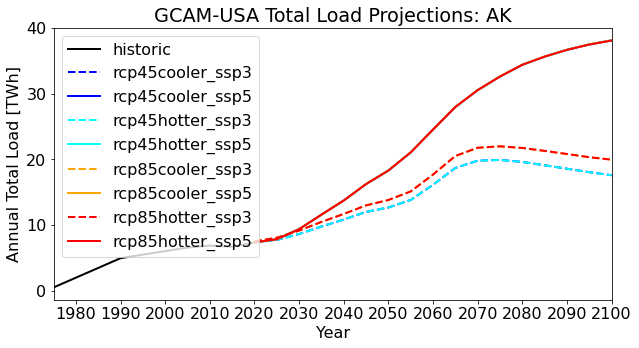

In [8]:
# Create a list of the unique states in the GCAM-USA output file:
states = gcam_df['state'].unique()

# Loop over the states and make the plot for each state:
#for i in range(len(states)):
for i in range(1):    
    plot_load_time_series(gcam_df = gcam_df,
                          state = states[i], 
                          image_output_dir = image_output_dir, 
                          image_resolution = 300, 
                          save_images = False)
